In [1]:
import numpy as np
import pandas as pd 
import string

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [4]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

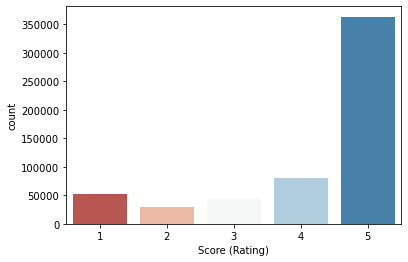

In [5]:
sns.countplot(x='Score', data=df, palette='RdBu')
plt.xlabel('Score (Rating)')
plt.show()

5-star reviews constitute a large proportion (64%) of all reviews. The next most prevalent rating is 4-stars(14%), followed by 1-star (9%), 3-star (8%), and finally 2-star reviews (5%).

In [6]:
temp_df = df[['UserId','HelpfulnessNumerator','HelpfulnessDenominator', 'Summary', 'Text','Score']].copy()
temp_df["Sentiment"] = temp_df["Score"].apply(lambda score: "positive" if score > 3 else ("negative" if score < 3 else "not defined"))
temp_df["Usefulness"] = (temp_df["HelpfulnessNumerator"] / temp_df["HelpfulnessDenominator"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and n <= 0.75 else "useless")))
temp_df.loc[temp_df.HelpfulnessDenominator == 0, 'Usefulness'] = "useless"
temp_df.head()

,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score,Sentiment,Usefulness
0,A3SGXH7AUHU8GW,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,positive,>75%
1,A1D87F6ZCVE5NK,0,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,negative,useless
2,ABXLMWJIXXAIN,1,1,"""Delight"" says it all",This is a confection that has been around a fe...,4,positive,>75%
3,A395BORC6FGVXV,3,3,Cough Medicine,If you are looking for the secret ingredient i...,2,negative,>75%
4,A1UQRSCLF8GW1T,0,0,Great taffy,Great taffy at a great price. There was a wid...,5,positive,useless


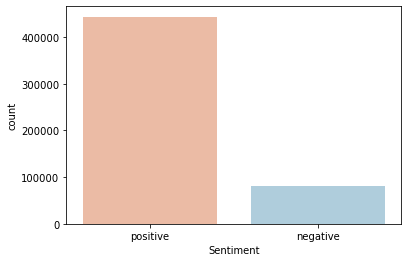

In [7]:
sns.countplot(x='Sentiment', order=["positive", "negative"], data=temp_df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

In [8]:
pos = temp_df.loc[temp_df['Sentiment'] == 'positive']
pos = pos[:1000]
neg = temp_df.loc[temp_df['Sentiment'] == 'negative']
neg = neg[:1000]

In [9]:
def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["Summary"]:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [10]:
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

In [11]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

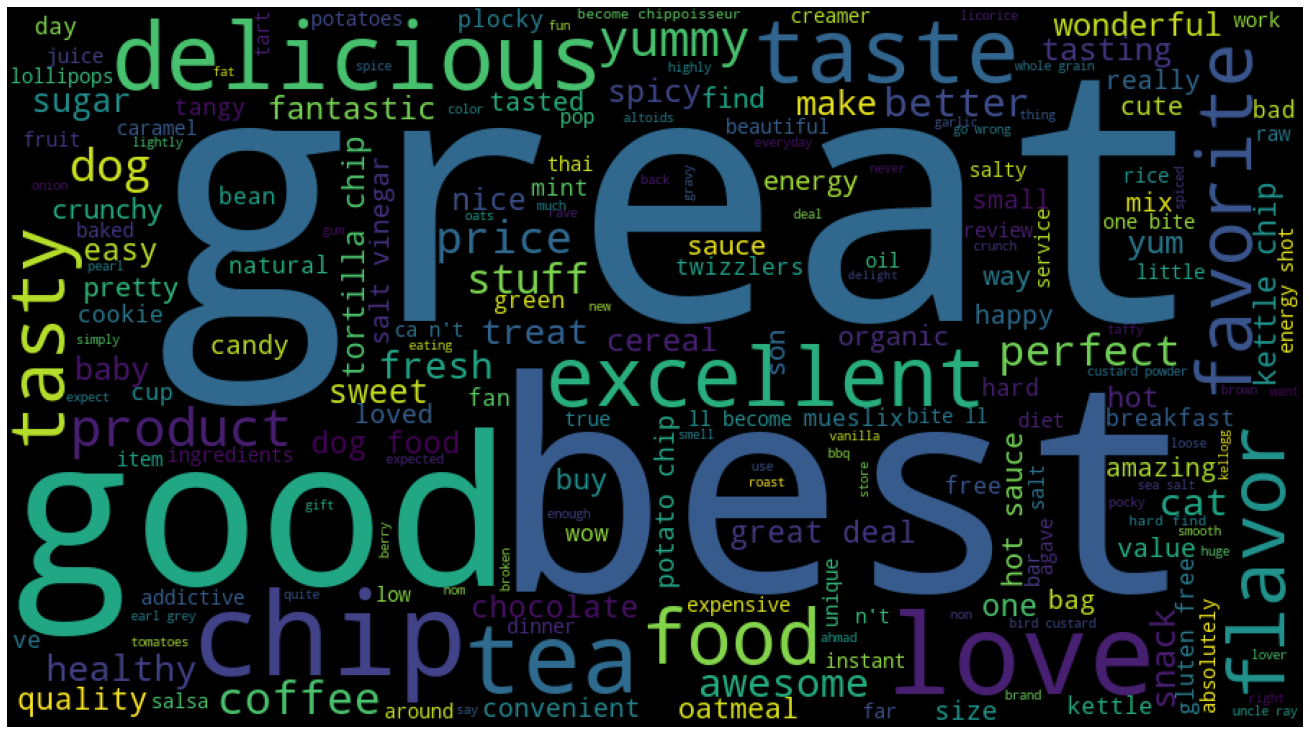

In [12]:
plot_Cloud(pos_wordcloud)

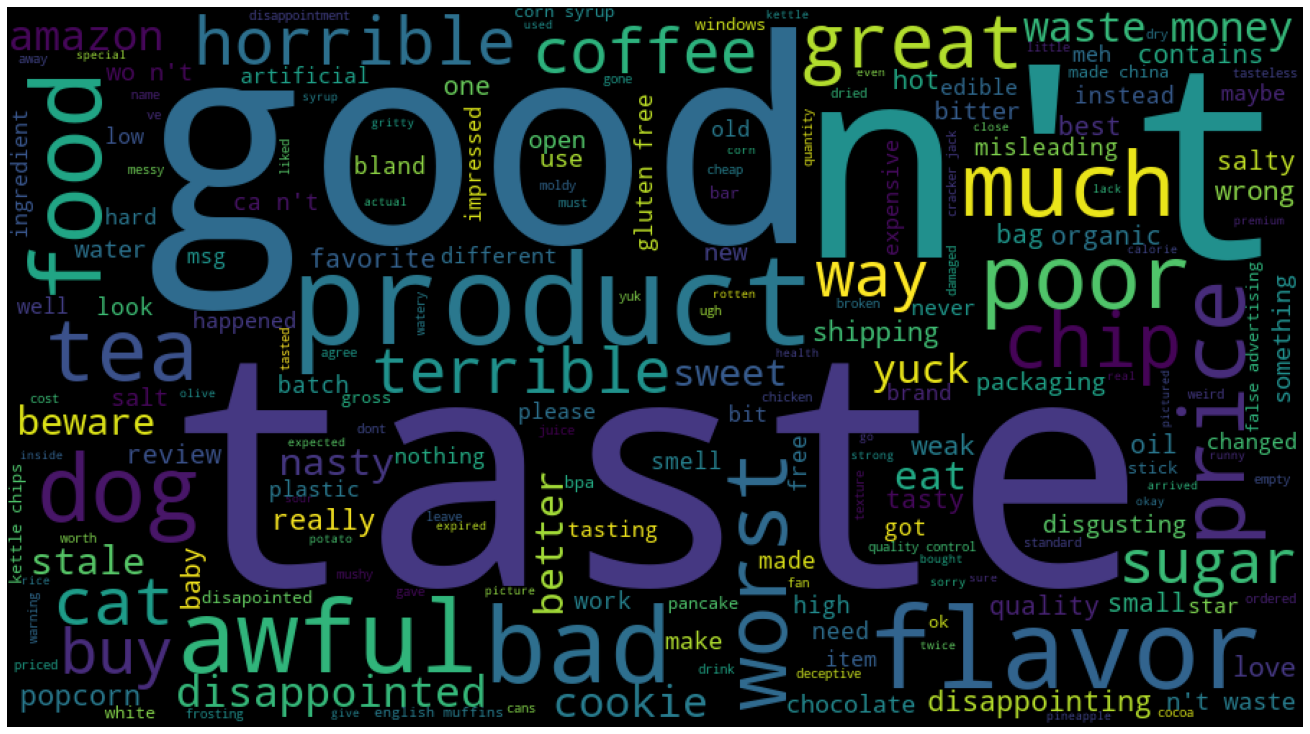

In [13]:
plot_Cloud(neg_wordcloud)

In [14]:
temp_df.Usefulness.value_counts()

useless    270052
>75%       202836
25-75%      57286
<25%        38280
Name: Usefulness, dtype: int64

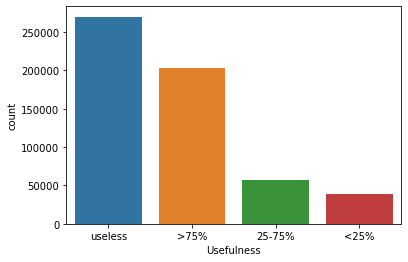

In [15]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=temp_df)
plt.xlabel('Usefulness')
plt.show()

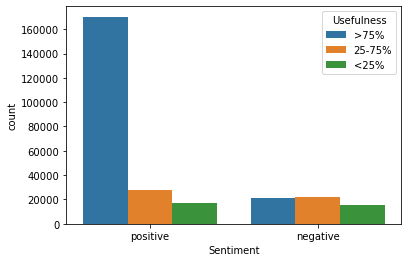

In [16]:
sns.countplot(x='Sentiment', hue='Usefulness', order=["positive", "negative"],hue_order=['>75%', '25-75%', '<25%'], data=temp_df)
plt.xlabel('Sentiment')
plt.show()

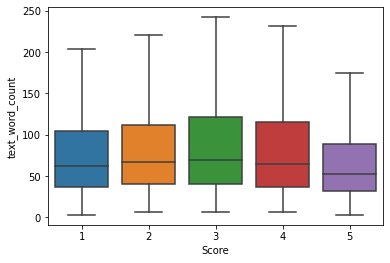

In [17]:
temp_df["text_word_count"] = temp_df["Text"].apply(lambda text: len(text.split()))
sns.boxplot(x='Score',y='text_word_count', data=temp_df, showfliers=False)
plt.show()

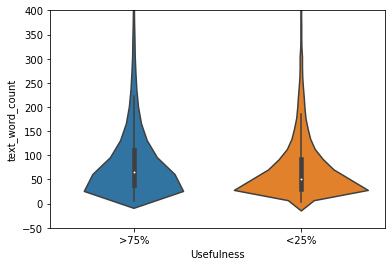

In [18]:
sns.violinplot(x='Usefulness', y='text_word_count', order=[">75%", "<25%"], data=temp_df)
plt.ylim(-50, 400)
plt.show()

In [19]:
x = temp_df.UserId.value_counts()
x.to_dict()
temp_df["reviewer_freq"] = temp_df["UserId"].apply(lambda counts: "Frequent (>50 reviews)" if x[counts]>50 else "Not Frequent (1-50)")

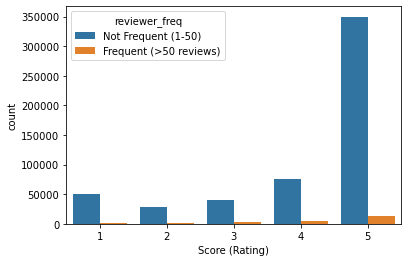

In [20]:
ax = sns.countplot(x='Score', hue='reviewer_freq', data=temp_df)
ax.set_xlabel('Score (Rating)')
plt.show()

In [21]:
y = temp_df[temp_df.reviewer_freq=="Frequent (>50 reviews)"].Score.value_counts()
z = temp_df[temp_df.reviewer_freq=="Not Frequent (1-50)"].Score.value_counts()
tot_y = y.sum()
y = (y/tot_y)*100
tot_z = z.sum()
z = (z/tot_z)*100

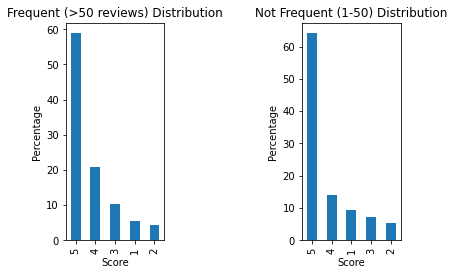

In [22]:
ax1 = plt.subplot(131)
y.plot(kind="bar",ax=ax1)
plt.xlabel("Score")
plt.ylabel("Percentage")
plt.title("Frequent (>50 reviews) Distribution")

ax2 = plt.subplot(133)
z.plot(kind="bar",ax=ax2)
plt.xlabel("Score")
plt.ylabel("Percentage")
plt.title("Not Frequent (1-50) Distribution")
plt.show()

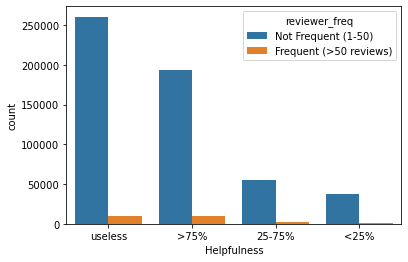

In [23]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], hue='reviewer_freq', data=temp_df)
plt.xlabel('Helpfulness')
plt.show()

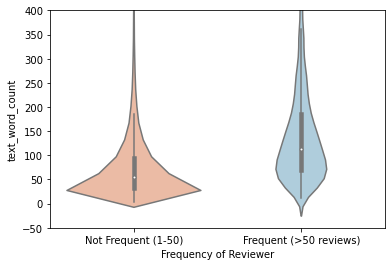

In [24]:
sns.violinplot(x='reviewer_freq', y='text_word_count', data=temp_df, palette='RdBu')
plt.xlabel('Frequency of Reviewer')
plt.ylim(-50, 400)
plt.show()

* Positive reviews are very common.
* Positive reviews are shorter.
* Longer reviews are more helpful.
* Despite being more common and shorter, positive reviews are found more helpful.
* Frequent reviewers are more discerning in their ratings, write longer reviews, and write more helpful reviews